Uncomment the following line of code by deleting the hash sign "#" at the beginning of the line if you run this notebook in Google Colab. Run it to install [Uproot](https://pypi.org/project/uproot/), a Python package that helps import data from a CERN [ROOT](https://root.cern.ch/) file. You don't have to do it if you run the notebook in [Binder](https://mybinder.org).

In [1]:
#!pip install uproot

In [2]:
# load uproot package
import uproot as up

In [3]:
# load data table, or tree, as it is called by physicists, from a ROOT file shared through Google Drive
t = up.open("https://drive.google.com/uc?id=1cnNmpTQE_vNGnnvs69aLsdNQHyFfeypM:t")

In [4]:
# show the contents of the data table
t.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
n                    | int32_t                  | AsDtype('>i4')
m                    | int32_t                  | AsDtype('>i4')
trk                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
stp                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
vlm                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
pro                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
pdg                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
pid                  | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
xx                   | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
yy                   | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
zz                   | std::vector<double>      | AsJagged(A

In [5]:
# get hits' volume id, vlm
vlm = t.arrays("vlm", library="pd")

In [6]:
vlm

vlm
entry subentry     
0     0          11
      1          11
      2          11
      3          11
      4          11
...             ...
999   63         11
      64         11
      65         11
      66         11
      67         11

[76590 rows x 1 columns]

In [7]:
import matplotlib.pyplot as plot

(array([ 3679.,  4117.,  4407.,  4663.,  4465.,  4714.,  4694.,  4543.,
         4883., 36425.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

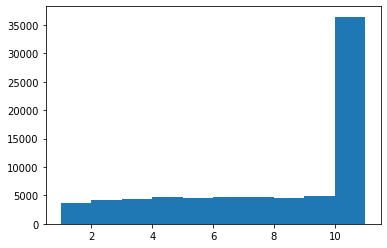

In [10]:
plot.hist(vlm)

[PGD encoding](https://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf) is a unique id assigned to each particle

In [11]:
# get particles' pgd encoding
pdg = t.arrays("pdg", library="pd")

In [12]:
pdg

pdg
entry subentry     
0     0         -13
      1         -13
      2         -13
      3         -13
      4         -13
...             ...
999   63         11
      64         11
      65         11
      66         11
      67         11

[76590 rows x 1 columns]

/var/folders/p9/c60msxtx4gzbpqykcbj3nzg00000gn/T/ipykernel_47633/1760862998.py:1: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plot.yscale('log', nonposy='clip')


(array([3.1012e+04, 0.0000e+00, 2.4000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.1762e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.7920e+03]),
 array([-13.   , -12.125, -11.25 , -10.375,  -9.5  ,  -8.625,  -7.75 ,
         -6.875,  -6.   ,  -5.125,  -4.25 ,  -3.375,  -2.5  ,  -1.625,
         -0.75 ,   0.125,   1.   ,   1.875,   2.75 ,   3.625,   4.5  ,
          5.375,   6.25 ,   7.125,   8.   ,   8.875,   9.75 ,  10.625,
         11.5  ,  12.375,  13.25 ,  14.125,  15.   ,  15.875,  16.75 ,
         17.625,  18.5  ,  19.375,  20.25 ,  21.125,  22.   ]),
 <BarContainer object of 40 artists

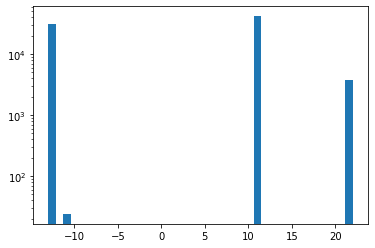

In [21]:
plot.yscale('log', nonposy='clip')
plot.hist(pdg,bins=40)

In [22]:
dedx = t.arrays("de/dl", "(vlm==11) & (pdg==-13)", library="pd")

In [23]:
dedx

de/dl
entry subentry          
0     0              NaN
      1         0.179125
      2         0.255781
      3         0.211445
      4         0.160292
...                  ...
999   22        0.063538
      25        0.210795
      28        0.127748
      29        0.173052
      30        0.120888

[16076 rows x 1 columns]

(array([2.680e+02, 4.580e+02, 8.620e+02, 1.282e+03, 1.885e+03, 2.476e+03,
        2.826e+03, 1.905e+03, 1.011e+03, 6.010e+02, 4.020e+02, 2.550e+02,
        2.070e+02, 1.390e+02, 1.180e+02, 8.900e+01, 6.400e+01, 5.300e+01,
        5.200e+01, 2.900e+01, 2.800e+01, 1.100e+01, 8.000e+00, 1.000e+01,
        3.000e+00, 7.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        1.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

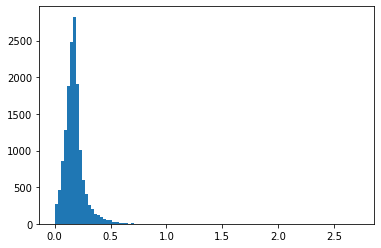

In [24]:
plot.hist(dedx, bins=100)

(array([3.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 1.700e+01, 3.300e+01,
        1.890e+02, 6.360e+02, 2.437e+03, 4.575e+03, 3.774e+03, 1.822e+03,
        7.360e+02, 3.120e+02, 1.430e+02, 7.200e+01, 3.900e+01, 3.400e+01,
        2.400e+01, 1.600e+01, 1.000e+01, 4.000e+00, 7.000e+00, 1.100e+01,
        3.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

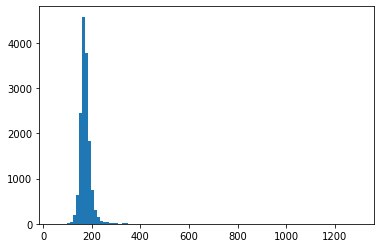

In [25]:
plot.hist(t.arrays("de/dl", "(vlm>0) & (vlm<11) & (pdg==-13)", library="pd"), bins=100)